In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid') # sns에 흰색 그리드 유지
import missingno # 결측치 시각화

# KFold (교차 검증을 사용하기 위해)
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증 데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가 함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier


# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import  XGBRegressor

# 머신러닝 알고리즘 - 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 머신러닝 알고리즘 - 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝 알고리즘 
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# 다중분류를 위한 원핫 인코더
from keras.utils import to_categorical

# 학습 자동 중단
from keras.callbacks import EarlyStopping

# 모델 저장
from keras.callbacks import ModelCheckpoint

# 저장된 딥러닝 모델 불러오기
from keras.models import load_model

# 딥러닝
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Embedding
from keras.layers import LSTM

# 자연어 처리
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences

# 저장
import pickle

# 시간 모듈
import time

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우용
plt.rcParams['font.family'] = 'AppleGothic'   # 맥용
plt.rcParams['font.size'] = 10                 # 폰트 크기
plt.rcParams['figure.figsize'] = 10,8          # 그래프 크기
plt.rcParams['axes.unicode_minus'] = False     # - 기호 깨짐 방지


# 경고 메시지가 안나오게 하기
import warnings
warnings.filterwarnings('ignore')

# gpu 사용 초기화 및 할당
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
# seed값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
# 로이터 데이터 불러오기
from keras.datasets import reuters

# 빈도가 높은 1000개의 단어 
(X_train, y_train), (X_test, y_test)=reuters.load_data(num_words=1000, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


In [4]:
# 데이터 확인
# 카테고리 개수
a1 = np.max(y_train)+1
print(f'카테고리 개수: {a1}')

# 학습용 뉴스 기사 개수
a2 = len(X_train)
print(f'학습용 뉴스 기사 개수 : {a2}')

# 테스트용 뉴스 기사 개수
a3 = len(X_test)
print(f'테스트용 뉴스 기사 개수 : {a3}')

print(X_train[0])

카테고리 개수: 46
학습용 뉴스 기사 개수 : 8982
테스트용 뉴스 기사 개수 : 2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
# 서로 개수가 다른 뉴스기사 리스트 원소의 개수를 똑같이 맞춰준다.
# 부족한 부분은 0으로 채워준다.
X_train = pad_sequences(X_train)
X_test  = pad_sequences(X_test)

In [6]:
# 결과 데이터를 원핫 인코딩
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [7]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
# 모델 설정
model = Sequential()

# 문장당 최대 1000개의 데이터를 100개로 줄여라
model.add(Embedding(1000,100))
# RNN(LSTM)을 이용한 학습
model.add(LSTM(100, activation='tanh'))
# 출력층 (카테고리의 개수)
model.add(Dense(46, activation='softmax'))

In [9]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [10]:
# 모델 학습 실행
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=100, epochs=20, verbose=1)

Epoch 1/20
90/90 [==============================] - 41s 383ms/step - loss: 2.9662 - accuracy: 0.3179 - val_loss: 2.1452 - val_accuracy: 0.4804
Epoch 2/20
90/90 [==============================] - 33s 369ms/step - loss: 2.0572 - accuracy: 0.4873 - val_loss: 1.9287 - val_accuracy: 0.5111
Epoch 3/20
90/90 [==============================] - 33s 369ms/step - loss: 1.8966 - accuracy: 0.5163 - val_loss: 1.7559 - val_accuracy: 0.5557
Epoch 4/20
90/90 [==============================] - 33s 370ms/step - loss: 1.7092 - accuracy: 0.5602 - val_loss: 1.8184 - val_accuracy: 0.5356
Epoch 5/20
90/90 [==============================] - 33s 370ms/step - loss: 1.8837 - accuracy: 0.5222 - val_loss: 1.7216 - val_accuracy: 0.5717
Epoch 6/20
90/90 [==============================] - 33s 371ms/step - loss: 1.6748 - accuracy: 0.5795 - val_loss: 1.6750 - val_accuracy: 0.5824
Epoch 7/20
90/90 [==============================] - 33s 372ms/step - loss: 1.7258 - accuracy: 0.5488 - val_loss: 1.6871 - val_accuracy: 0.5761

In [12]:
# 테스트 정확도 출력
model.evaluate(X_test, y_test)[1]

71/71 [==============================] - 1s 19ms/step - loss: 1.2628 - accuracy: 0.6830


0.6829919815063477

In [13]:
# 테스트 데이터의 오차
y_vloss = history.history['val_loss']

# 학습 데이터의 오차
y_loss = history.history['loss']

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


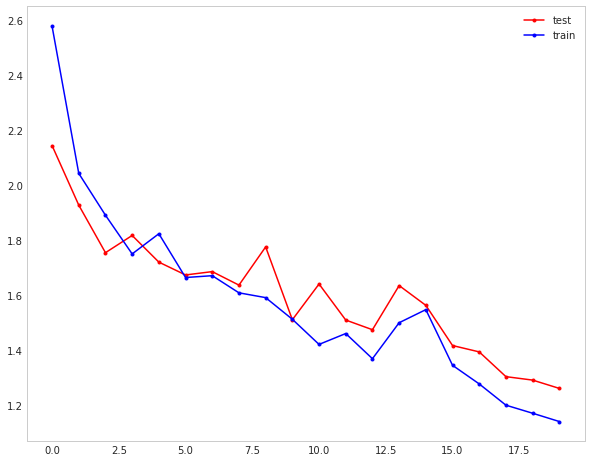

In [14]:
# 그래프
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='test')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train')

plt.legend()
plt.grid()
plt.show()